# Customer Support Ticket Classification

In [1]:
# importing necessary libraries

# for data manipulation
import pandas as pd
import numpy as np

# for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# for sorting dicionary
import operator

# for plotting wordcloud
from wordcloud import WordCloud

# for data cleaning
from nltk import word_tokenize
from nltk.stem import PorterStemmer
import re

# splitting of data
from sklearn.model_selection import train_test_split

# to vectorize text data
from sklearn.feature_extraction.text import TfidfVectorizer

# scikit model used
from sklearn.ensemble import RandomForestClassifier

# metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# hypertuning model
from sklearn.model_selection import RandomizedSearchCV

# to dump model
import pickle

In [2]:
# reading data
data = pd.read_csv('all_tickets.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             47837 non-null  object
 1   body              48549 non-null  object
 2   ticket_type       48549 non-null  int64 
 3   category          48549 non-null  int64 
 4   sub_category1     48549 non-null  int64 
 5   sub_category2     48549 non-null  int64 
 6   business_service  48549 non-null  int64 
 7   urgency           48549 non-null  int64 
 8   impact            48549 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.3+ MB


In [4]:
data.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [5]:
data.shape

(48549, 9)

In [6]:
# basic statistics
data.describe()

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
count,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000
mean,0.713115,4.491153,11.614390,32.004634,49.482605,2.506066,3.677460
std,0.452312,1.103556,13.752707,33.602122,22.806100,0.855646,0.591513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,2.000000,7.000000,32.000000,2.000000,3.000000
50%,1.000000,4.000000,3.000000,21.000000,49.000000,3.000000,4.000000
75%,1.000000,5.000000,21.000000,53.000000,67.000000,3.000000,4.000000
max,1.000000,12.000000,58.000000,114.000000,102.000000,3.000000,4.000000


In [7]:
duplicate=data.duplicated()
print('Total count of duplicated values :',duplicate.sum())

Total count of duplicated values : 0


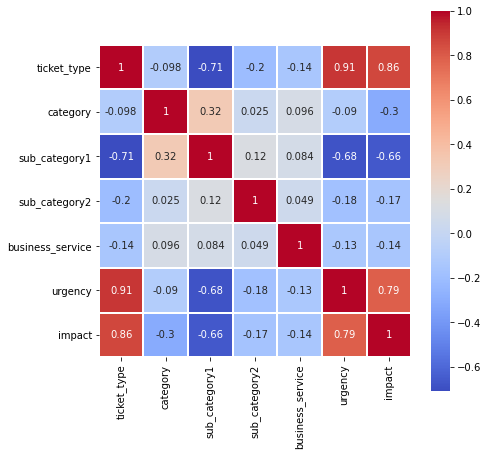

In [8]:
# correlation matrix using the heatmap
corr_mat=data.corr()
plt.figure(figsize = corr_mat.shape)
sns.heatmap(data=corr_mat,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

**OBSERVATIONS** \
From the correlation matrix, we can deduce that ticket_type, urgency and impact have very high correlations.

# Explanatory Data Analysis

## Distributions or Univariate Analysis

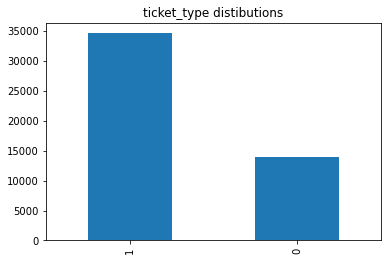

In [9]:
data['ticket_type'].value_counts().plot(kind='bar')
plt.title('ticket_type distibutions')
plt.show()

* More than 70% of ticket generated, required human-interventions( ticket-type = 1 ).
* The given dataset is imbalanced.

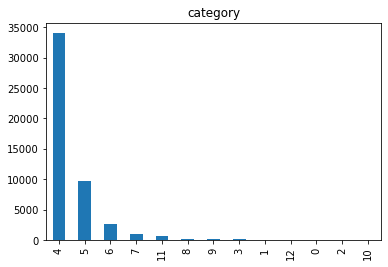

In [10]:
data['category'].value_counts().plot(kind='bar')
plt.title('category')
plt.show()

* Out of the ticket generated, most of them belongs to `category` 4.

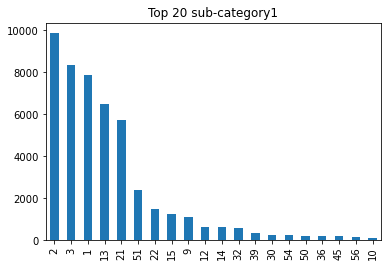

In [11]:
data['sub_category1'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 sub-category1')
plt.show()

* Most of the tickets generated have sub-category-1 of class-2, then followed by class-3.
* Almost 80% of the tickets belongs these five sub-category-1.**( class-2, class-3, class-1, class-13 and class-21 )**
* Rest sub-categories are very less probable.

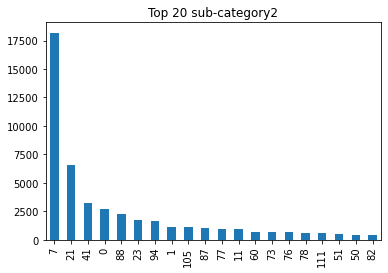

In [12]:
data['sub_category2'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 sub-category2')
plt.show()

* 36% of the tickets belongs to class-7 of sub-category-2. 

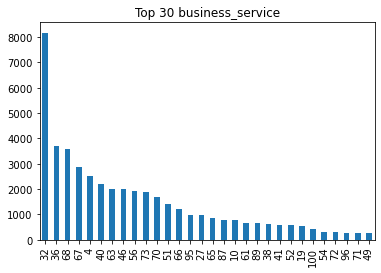

In [13]:
data['business_service'].value_counts()[:30].plot(kind='bar')
plt.title('Top 30 business_service')
plt.show()

* `business_service` of class-32 is most frequent in the dataset.

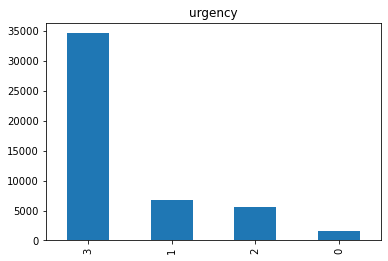

In [14]:
data['urgency'].value_counts().plot(kind='bar')
plt.title('urgency')
plt.show()

* Almost 72% of the tickets have the business `urgency` of level 3.

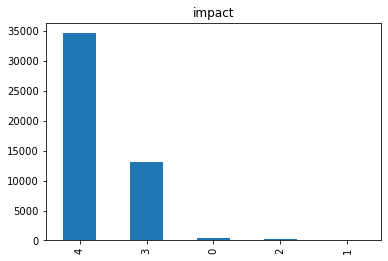

In [15]:
data['impact'].value_counts().plot(kind='bar')
plt.title('impact')
plt.show()

* More than 98% of the tickets have the `impact` of level 4 and of level-3. 

## Bivariate Analysis

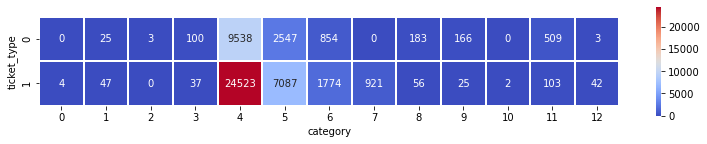

In [16]:
fig, ax = plt.subplots(figsize=(13,2))
ax = sns.heatmap(pd.crosstab(data['ticket_type'],data['category']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Almost 70% out of the tickets that required human interventions, belongs to category of class-4 and class-5.


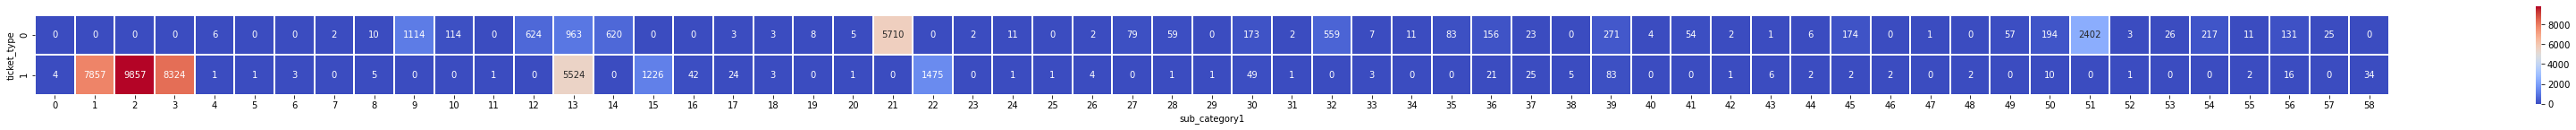

In [17]:
fig, ax = plt.subplots(figsize=(59,2))
ax = sns.heatmap(pd.crosstab(data['ticket_type'],data['sub_category1']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Ticket having class-2 of `sub_category1` required more human intervention than the rest.

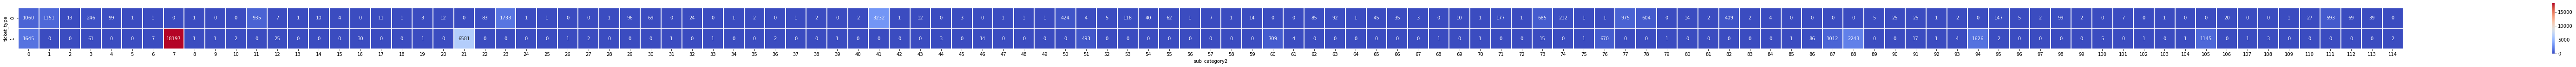

In [18]:
fig, ax = plt.subplots(figsize=(115,2))
ax = sns.heatmap(pd.crosstab(data['ticket_type'],data['sub_category2']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Ticket having class-7 of `sub_category2`, requires more human intervention than the others, which compromise almost 37.5% of the tickets.

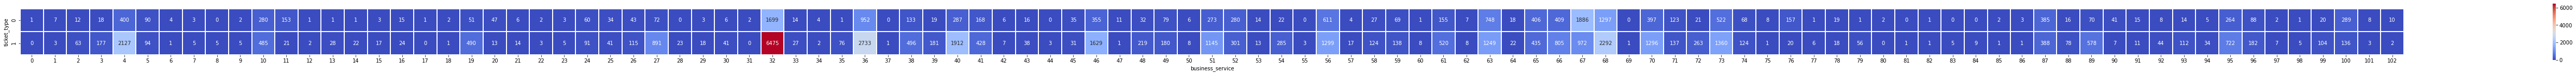

In [19]:
fig, ax = plt.subplots(figsize=(103,2))
ax = sns.heatmap(pd.crosstab(data['ticket_type'],data['business_service']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Ticket having class-32 of `business_service`, requires more human intervention than the others.

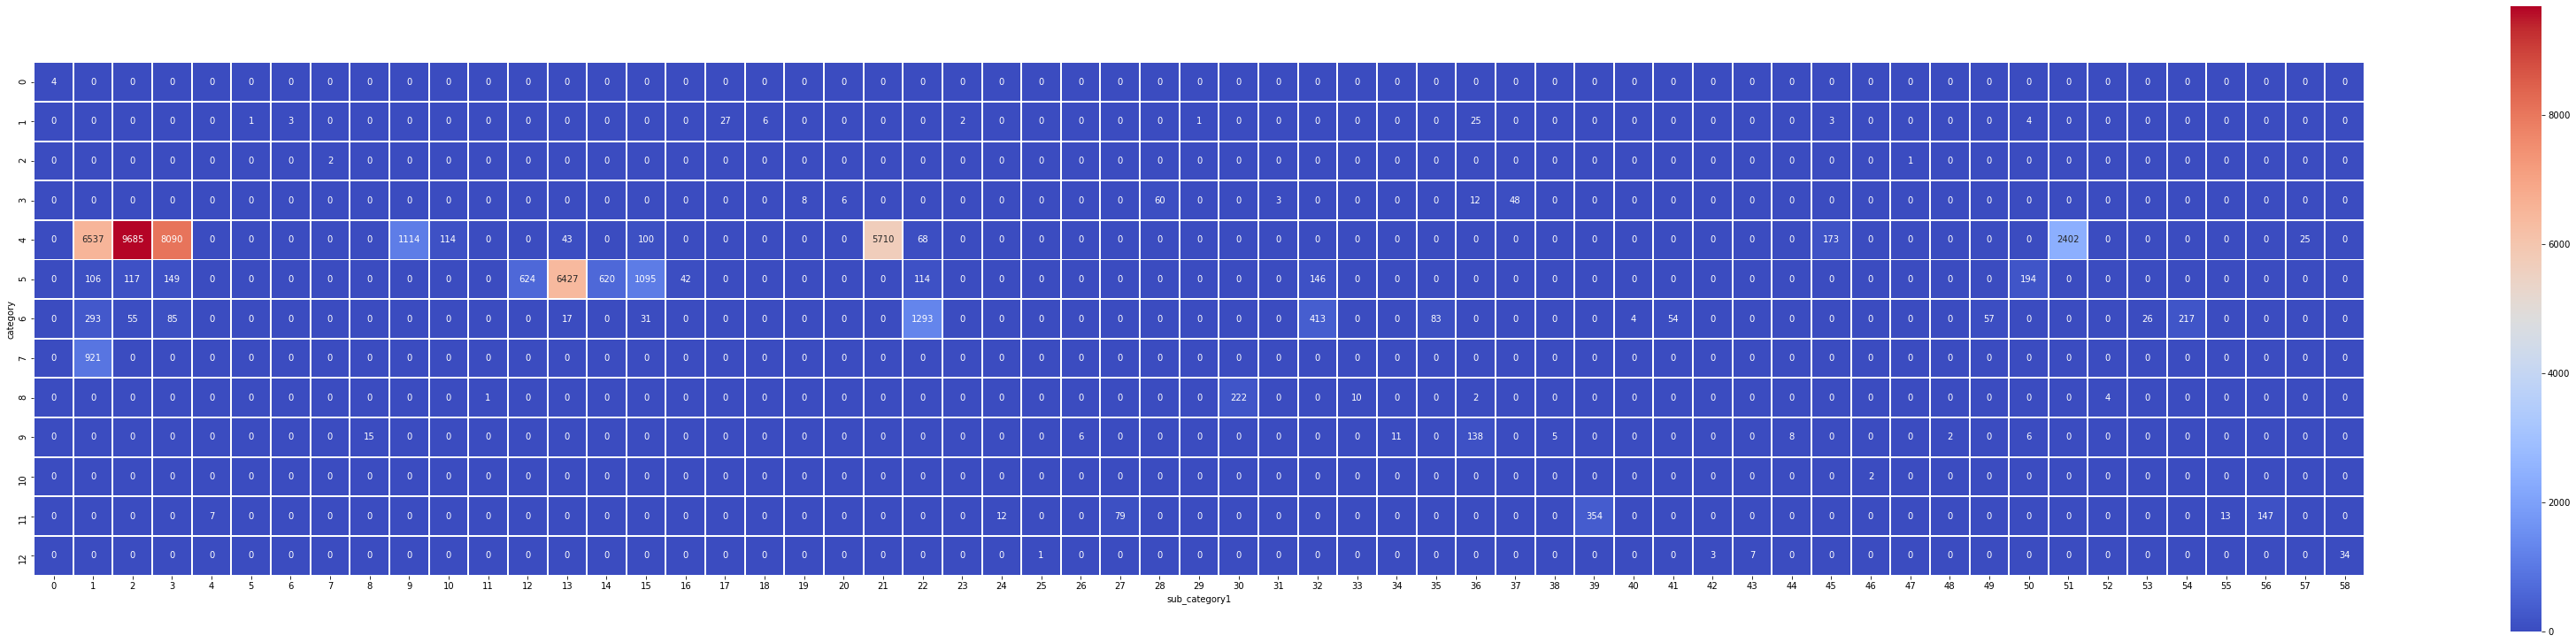

In [20]:
fig, ax = plt.subplots(figsize=(59,13))
ax = sns.heatmap(pd.crosstab(data['category'],data['sub_category1']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Most of the tickets have class-4 of `category`, and class-2 of `subcategory-1`.
* 50% of tickets have class-4 `category` and belongs to class-1, class-2, class-3 of `sub_category1`

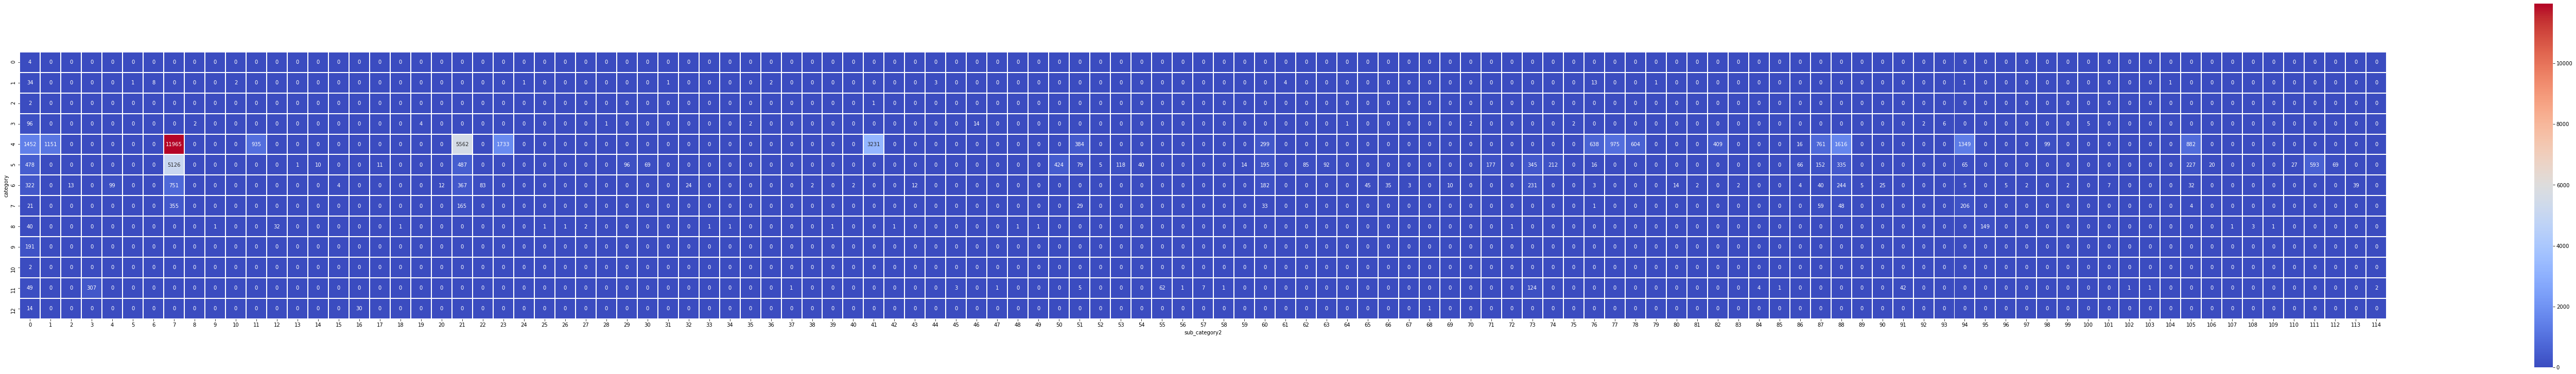

In [21]:
fig, ax = plt.subplots(figsize=(103,13))
ax = sns.heatmap(pd.crosstab(data['category'],data['sub_category2']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Almost 24.6% of the tickets have class-4 `category` and class-7 `sub_category2`

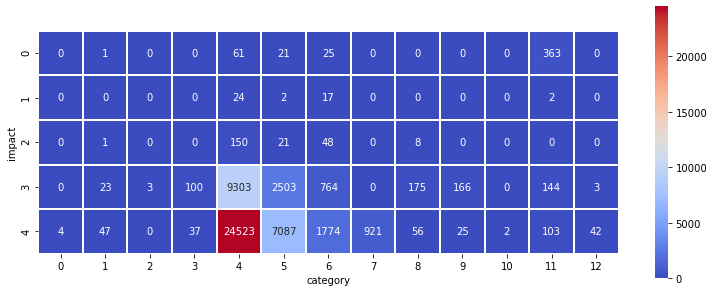

In [22]:
fig, ax = plt.subplots(figsize=(13,5)) 
ax = sns.heatmap(pd.crosstab(data['impact'],data['category']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* More than 65.1% of the total tickets, which belongs to class-4 and class-5 of `category`, have business `impact` level 4.
* More than 91.3% of the tickets having business `impact` level 4, belongs to class-4 and class-5 of `category`.

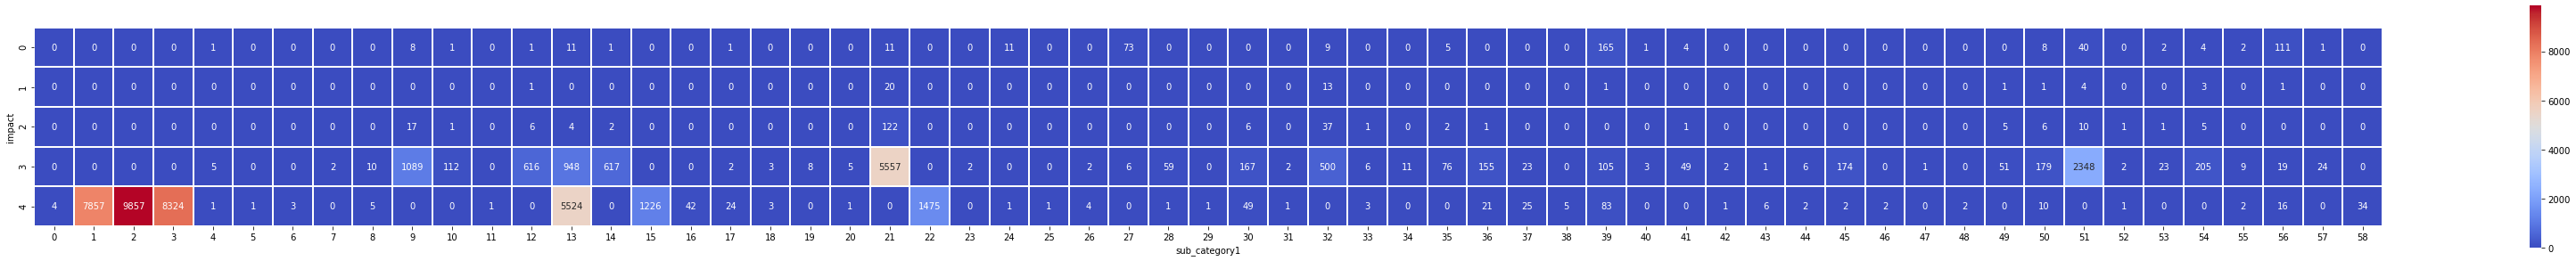

In [23]:
fig, ax = plt.subplots(figsize=(59,5)) 
ax = sns.heatmap(pd.crosstab(data['impact'],data['sub_category1']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* More than 53.6% of tickets having business `impact` of level-4 and belongs to class-1, class-2, class-3 of `sub_category1`.

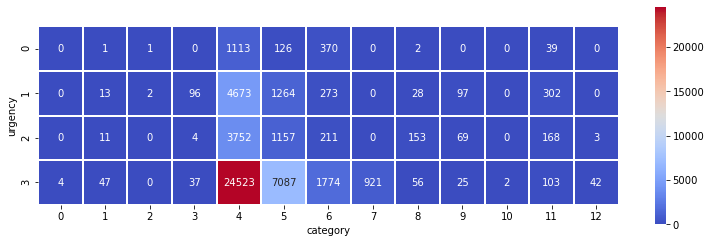

In [24]:
fig, ax = plt.subplots(figsize=(13,4)) 
ax = sns.heatmap(pd.crosstab(data['urgency'],data['category']), annot=True, fmt='.0f',cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* More than 72.3% of the total tickets, which belongs to class-4 and class-5 of `category`, have `urgency` level 3.
* More than 91.3% of the tickets having `urgency` level 3, belongs to class-4 and class-5 of `category`.

**Seems like `urgency` and `impact` is distributed alike for the tickets which required humnan interventions.** 

Now analysing these two columns.

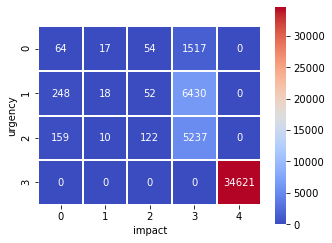

In [25]:
fig, ax = plt.subplots(figsize=(5,4)) 
ax = sns.heatmap(pd.crosstab(data['urgency'],data['impact']), annot=True, fmt='.0f',cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Majority of the tickets(more than 71.3% of the total) have `urgency` of level-3 and business `impact` of level-4.
* All tickets of `urgency` level-3, have business `impact` of level-4.
* All tickets with business `impact` of level-4, have `urgency` of level-3.

Further, segregating the `urgency` vs `impact` graphs with respect to ticket-type.

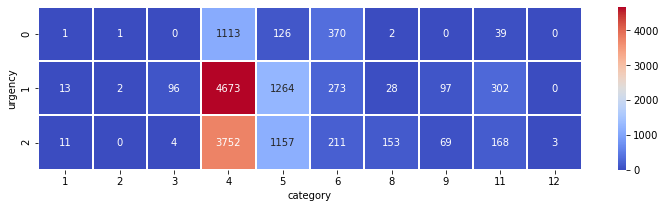

In [26]:
# tickets which doesn't required human interventions

fig, ax = plt.subplots(figsize=(13,3)) 
ax = sns.heatmap(pd.crosstab(data[data['ticket_type']==0]['urgency'],data[data['ticket_type']==0]['category']), annot=True, fmt='.0f',cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Clearly, ticket whose level of `urgency` is not 3, irrespective of the ticket `category`, does not required human interventions.
* More than 60.5% of the total tickets, belongs to class-4 of `category`, with `urgency` level-2 and level-1. 

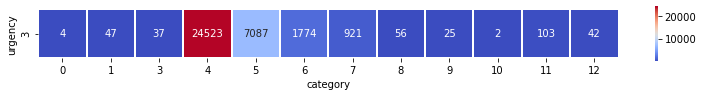

In [27]:
# tickets which required human interventions

fig, ax = plt.subplots(figsize=(13,1)) 
ax = sns.heatmap(pd.crosstab(data[data['ticket_type']==1]['urgency'],data[data['ticket_type']==1]['category']), annot=True, fmt='.0f',cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Irrespective of the ticket `category`, if a ticket has `urgency` of level-3, then it must required human interventions.
* More than 70.7% of the tickets which requires human intervention, belongs to class-4 of ticket `category`.

## Text Analysis

In [28]:
# creating a checkpoint and filling null values
df = data.copy()
df.fillna('', inplace=True)

In [29]:
# joining title and body into info column
df['info'] = df['title'] + ' ' + df['body']

# dropping title and body column
df.drop(columns=['title','body'], inplace=True)

In [30]:
# Adding some basic columns (feature engineering)
df['info_char_length'] = df['info'].apply(lambda x: len(x))
df['word_used'] = df['info'].apply(lambda x: len(x.split()))

In [31]:
# grouping dataframe wrt ticket_type
ticket_df = df.groupby(by='ticket_type')

In [32]:
# Min, Max and Total of info_length and word_used in ticket info
ticket_df.agg(['min','max','sum'])[['info_char_length', 'word_used']]

info_char_length                word_used              
                         min   max      sum       min  max      sum
ticket_type                                                        
0                          6  6880  5016349         2  981   781796
1                          7  7015  9092926         1  953  1325752

In [33]:
# Average length and word used in ticket info
ticket_df.agg(mean_info_length = ('info_char_length', np.mean), mean_word_used = ('word_used', np.mean))

,mean_info_length,mean_word_used
ticket_type,,
0,360.162909,56.131246
1,262.641923,38.293290


## Word Cloud Plotting
  * On whole dataset
  * On tickets which doesn't requires human interventions(ticket-type 0).
  * On tickets which requires human interventions(ticket-type 1).


### On whole tickets dataset

In [34]:
text = ' '.join(df['info'])

In [35]:
freq_dict = {}
for val in text.split():
    freq_dict[val.strip()] = freq_dict.get(val.strip(), 0) + 1

freq_dict = sorted(freq_dict.items(), key=operator.itemgetter(1), reverse=True)
freq_dict[:10]

[('please', 70918),
 ('pm', 29353),
 ('hi', 28906),
 ('regards', 27525),
 ('thank', 25261),
 ('for', 24558),
 ('hello', 23275),
 ('you', 21994),
 ('re', 21300),
 ('thanks', 20142)]

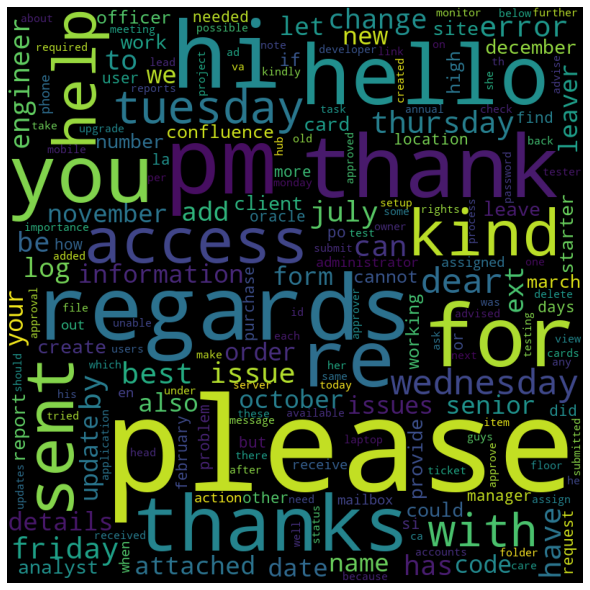

In [36]:
# ploting wordcloud

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='black', 
            min_font_size = 10).generate_from_frequencies(dict(freq_dict))
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

### Wordcloud on all records with words length greater than 3

In [37]:
freq_dict_1 = {}
for val in text.split():
    if len(val)>3:
        freq_dict_1[val.strip()] = freq_dict_1.get(val.strip(), 0) + 1

freq_dict_1 = sorted(freq_dict_1.items(), key=operator.itemgetter(1), reverse=True)
freq_dict_1[:10]

[('please', 70918),
 ('regards', 27525),
 ('thank', 25261),
 ('hello', 23275),
 ('thanks', 20142),
 ('sent', 14810),
 ('kind', 13375),
 ('access', 13166),
 ('help', 11307),
 ('tuesday', 11039)]

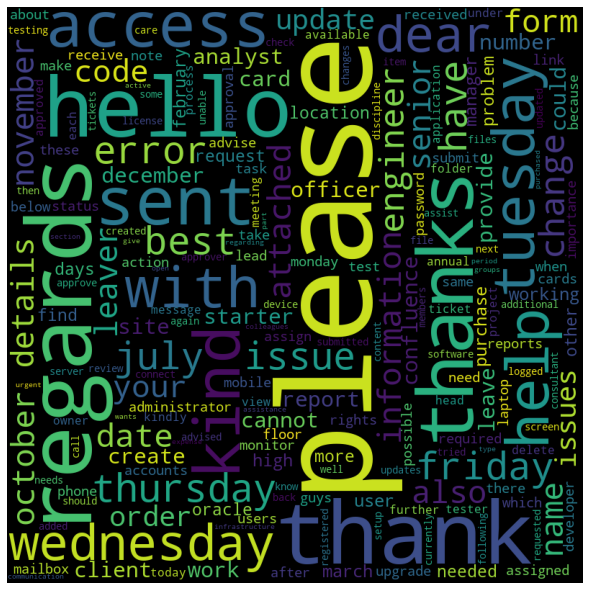

In [38]:
# ploting wordcloud having words with length greater than 3

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='black', 
            min_font_size = 10).generate_from_frequencies(dict(freq_dict_1))
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

### For tickets which does not required human interventions ( ticket_type = 0 )

In [39]:
# info of tickets with ticket_type=0
text_0 = ' '.join(df[df['ticket_type']==0]['info'])

freq_dict_2 = {}
for val in text_0.split():
    freq_dict_2[val.strip()] = freq_dict_2.get(val.strip(), 0) + 1

freq_dict_2 = sorted(freq_dict_2.items(), key=operator.itemgetter(1), reverse=True)
freq_dict_2[:10]

[('you', 21950),
 ('for', 18649),
 ('please', 17659),
 ('sent', 14761),
 ('with', 10210),
 ('can', 9517),
 ('have', 9459),
 ('hi', 7994),
 ('error', 7217),
 ('regards', 7184)]

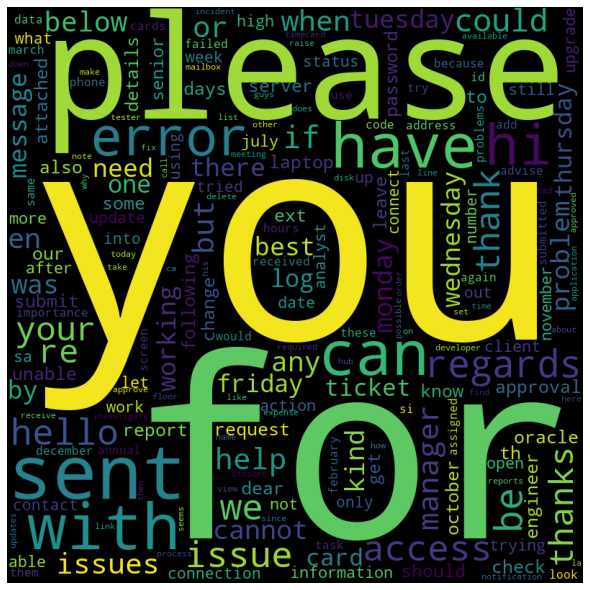

In [40]:
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='black', 
                      min_font_size = 10).generate_from_frequencies(dict(freq_dict_2))
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

### For tickets which does required human interventions ( ticket_type = 1 )

In [41]:
# info of tickets with ticket_type=0
text_1 = ' '.join(df[df['ticket_type']==1]['info'])

freq_dict_3 = {}
for val in text_1.split():
    freq_dict_3[val.strip()] = freq_dict_3.get(val.strip(), 0) + 1

freq_dict_3 = sorted(freq_dict_3.items(), key=operator.itemgetter(1), reverse=True)
freq_dict_3[:10]

[('please', 53259),
 ('pm', 29323),
 ('hi', 20912),
 ('regards', 20341),
 ('thank', 19177),
 ('hello', 16907),
 ('re', 16087),
 ('thanks', 14901),
 ('kind', 10261),
 ('tuesday', 8312)]

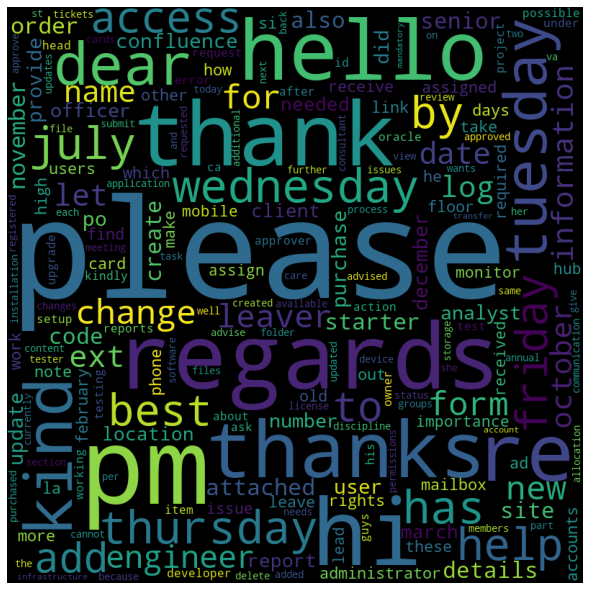

In [42]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      min_font_size = 10).generate_from_frequencies(dict(freq_dict_3))
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

## Data Cleaning

In [43]:
# viewing top 5 records of original data
data.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [44]:
# filling null values with empty string
data.fillna('', inplace=True)

In [45]:
# combining title and body columns into info
data['info'] = data['title'] + ' ' + data['body']

In [46]:
# dropping title and body columns
data.drop(columns=['title','body'], inplace=True)

In [47]:
# porter stemmer instance
stemmer = PorterStemmer()

In [48]:
# cleaning info column by removing punctuation, numbers and extra white spaces
data['info'] = data['info'].apply(lambda info : ' '.join([stemmer.stem(words.lower().strip()) for words in word_tokenize(str(re.sub('[^A-Za-z]+', ' ', info)))]))

## Splitting of Data into train, valid and test dataset

Splitting data into 3 cateories (training set, validation set and testing set) into 8:1:1 ratio.

In [49]:
train, test_and_valid = train_test_split(data, train_size=0.8, random_state=35, stratify=data['ticket_type'])

In [50]:
test, valid = train_test_split(test_and_valid, train_size=0.5, random_state=35, stratify=test_and_valid['ticket_type'])

In [51]:
train.shape, valid.shape, test.shape

((38839, 8), (4855, 8), (4855, 8))

**Writing it back to CSV files.**

In [52]:
# train CSV
train.to_csv('ticket_train.csv', index=False)

# valid CSV
valid.to_csv('ticket_tvalid.csv', index=False)

# test CSV
test.to_csv('ticket_test.csv', index=False)

## Importing Training and Validation dataset

Importing train and valid dataset to train and evaluate our TF-IDF model on it.

In [53]:
# importing training dataset
train = pd.read_csv('ticket_train.csv')

# importing validation dataset
valid = pd.read_csv('ticket_valid.csv')

In [54]:
# top 5 records
train.head()

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,info
0,1,5,13,105,32,3,4,search for old outlook thursday octob old hi f...
1,1,4,1,7,46,3,4,want to access account document want document ...
2,1,4,1,7,65,3,4,access right tuesday pm right hi instal comput...
3,0,4,21,41,32,1,3,pleas someon come and check the excel on thi c...
4,0,4,21,77,65,1,3,not work via sent thursday work via hi tri acc...


In [55]:
# top 5 records
valid.head()

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,info
0,1,4,1,21,35,3,4,pend expen claim juli pm re pend expen claim h...
1,1,5,13,7,32,3,4,us adapt adapt dear near futur go plea help pl...
2,0,4,51,78,4,2,0,intern audit leaver vs activ ad account leaver...
3,1,4,2,88,68,3,4,oracl list expen report pm expen report hi how...
4,1,4,3,88,56,3,4,cancel incid with progress task cancel incid p...


## TF-IDF transformation of training and validating set

### Training dataset

In [56]:
# vectorizer instance
tfidf = TfidfVectorizer(max_features=5000)

In [57]:
# fitting and transforming tfidf vectorizer
tfidf_train_df = tfidf.fit_transform(train['info'])

### Validating dataset

In [58]:
# transforming the valid dataset's info column using tfidf vectorizer
tfidf_valid_df = tfidf.transform(valid['info'])

### Dumping td-idf vectorizer instance 

In [59]:
pickle.dump(tfidf,open('tfidf.pkl','wb'))

## Data Modelling

Here, we are considering Random Forest Classifier, to predict the ticket-type by using tf-idf vector on text data.

In [60]:
# features and target of training dataset
X_train = tfidf_train_df
y_train = train['ticket_type']

# features and target of validating dataset
X_valid = tfidf_valid_df
y_valid = valid['ticket_type']

In [61]:
# creating Random Forest Classifier instance
RFClf = RandomForestClassifier(random_state=35, class_weight = 'balanced')

In [62]:
# fitting the model with training features and target
RFClf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=35)

In [63]:
# predicting validating dataset ticket-type using validation dataset's features
y_valid_preds = RFClf.predict(X_valid)

## Model Evaluation

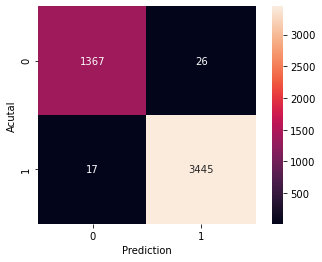

In [64]:
con_mat = confusion_matrix(y_valid, y_valid_preds)
sns.heatmap(con_mat, annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [65]:
acc = accuracy_score(y_valid, y_valid_preds)
print(f'Model accuracy score = {acc*100:0.2f}%.')

Model accuracy score = 99.11%.


In [66]:
print(classification_report(y_valid, y_valid_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1393
           1       0.99      1.00      0.99      3462

    accuracy                           0.99      4855
   macro avg       0.99      0.99      0.99      4855
weighted avg       0.99      0.99      0.99      4855



## Hypertuning the model

In [67]:
# grid for randomized search
params_grid = {'n_estimators' : np.arange(10,100,10),
               'max_depth' : [None, 3, 5, 10],
               'criterion' : ['gini', 'entropy']}

In [68]:
# initiating new Random Forest Classifier instance
clf = RandomForestClassifier(random_state=35, class_weight='balanced')

# creating a hyper-tuned model
ht_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = params_grid,
                            n_iter = 10,
                            cv = 3,
                            verbose = True)

In [70]:
ht_clf.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=35),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 5, 10],
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [71]:
# best parameters
ht_clf.best_params_

{'n_estimators': 80, 'max_depth': None, 'criterion': 'entropy'}

In [73]:
# maximum score achieved on training dataset
ht_clf.best_score_

0.9906794683381855

## Initialising Final HyperTuned Model

In [74]:
# creating final model
final_model = RandomForestClassifier(random_state = 35,
                                     class_weight = 'balanced',
                                     criterion = 'entropy',
                                     max_depth = None,
                                     n_estimators = 80)

In [75]:
# fitting final model
final_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=80, random_state=35)

In [76]:
# importing testing dataset
test = pd.read_csv('ticket_test.csv')

In [77]:
# feature column of testing dataset
X_test = tfidf.transform(test['info'])

# target column of testing dataset
y_test = test['ticket_type']

In [78]:
# predicting validating dataset ticket-type using validation fasttext encoded vector
y_test_preds = final_model.predict(X_test)

### Final Model Evaluation

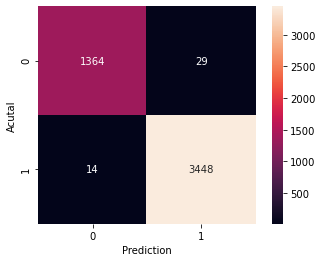

In [79]:
con_mat = confusion_matrix(y_test, y_test_preds)
sns.heatmap(con_mat, annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [80]:
acc = accuracy_score(y_test, y_test_preds)
print(f'Model accuracy score = {acc*100:0.2f}%.')

Model accuracy score = 99.11%.


In [81]:
print(classification_report(test['ticket_type'], y_test_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1393
           1       0.99      1.00      0.99      3462

    accuracy                           0.99      4855
   macro avg       0.99      0.99      0.99      4855
weighted avg       0.99      0.99      0.99      4855



### Dumping model using pickle

In [82]:
# dumping model
pickle.dump(final_model, open('Ticket_Classification_Model.pkl','wb'))

# Thank You